# Projeto: Ligações para o 911

Análise de alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

## Dados e Configuração

** Importar numpy e pandas **

In [2]:
import numpy as np
import pandas as pd

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Leia o arquivo csv como um dataframe chamado df **

In [4]:
df = pd.read_csv("911.csv")

** Verifique a info() do df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622849 entries, 0 to 622848
Data columns (total 9 columns):
lat          622849 non-null float64
lng          622849 non-null float64
desc         622849 non-null object
zip          546745 non-null float64
title        622849 non-null object
timeStamp    622849 non-null object
twp          622582 non-null object
addr         622849 non-null object
e            622849 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 42.8+ MB


** Verifique o cabeçalho do df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [8]:
df['zip'].value_counts().head(5)

19401.0    42424
19464.0    40965
19403.0    32575
19446.0    30218
19406.0    21155
Name: zip, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    52507
ABINGTON        37531
NORRISTOWN      34923
UPPER MERION    34095
CHELTENHAM      28707
Name: twp, dtype: int64

** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [10]:
df['title'].nunique()

147

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [11]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [14]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

In [15]:
df['Reason'].value_counts()

EMS        309942
Traffic    219772
Fire        93135
Name: Reason, dtype: int64

** Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

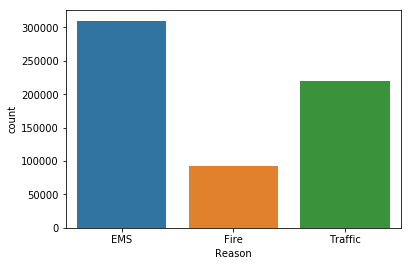

In [16]:
sns.countplot(x='Reason', data=df)

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [18]:
type(df['timeStamp'])

pandas.core.series.Series

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [25]:
df['Day'] = df['Day'].map(dmap)

In [26]:
df['Day'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day, dtype: object

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

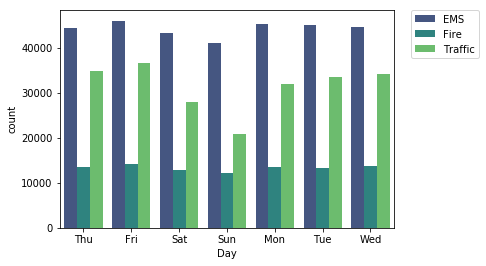

In [27]:
sns.countplot(x='Day', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

** Agora faça o mesmo para o mês: **

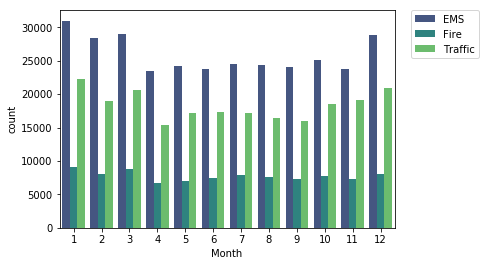

In [28]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [36]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,58441,58441,58441,51782,58441,58441,58417,58441,58441,58441,58441,58441
4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

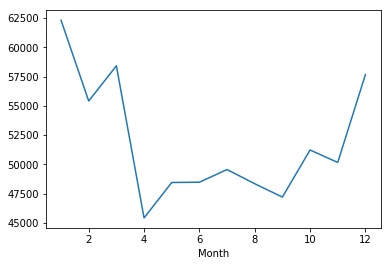

In [43]:
byMonth['twp'].plot()

In [44]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,58441,58441,58441,51782,58441,58441,58417,58441,58441,58441,58441,58441
3,4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428
4,5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467
5,6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


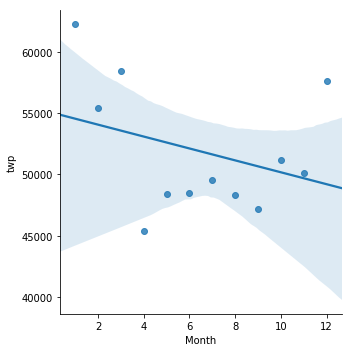

In [47]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [52]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [53]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
5         2015-12-10
6         2015-12-10
7         2015-12-10
8         2015-12-10
9         2015-12-10
10        2015-12-10
11        2015-12-10
12        2015-12-10
13        2015-12-10
14        2015-12-10
15        2015-12-10
16        2015-12-10
17        2015-12-10
18        2015-12-10
19        2015-12-10
20        2015-12-10
21        2015-12-10
22        2015-12-10
23        2015-12-10
24        2015-12-10
25        2015-12-10
26        2015-12-10
27        2015-12-10
28        2015-12-10
29        2015-12-10
             ...    
622819    2020-03-25
622820    2020-03-25
622821    2020-03-25
622822    2020-03-25
622823    2020-03-25
622824    2020-03-25
622825    2020-03-25
622826    2020-03-25
622827    2020-03-25
622828    2020-03-25
622829    2020-03-25
622830    2020-03-25
622831    2020-03-25
622832    2020-03-25
622833    2020-03-25
622834    2020-03-25
622835    202

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

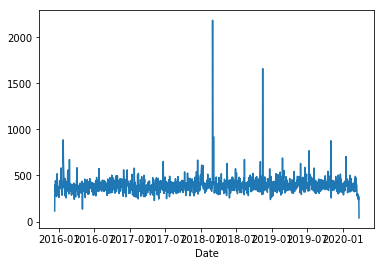

In [56]:
df.groupby('Date').count()['twp'].plot()

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

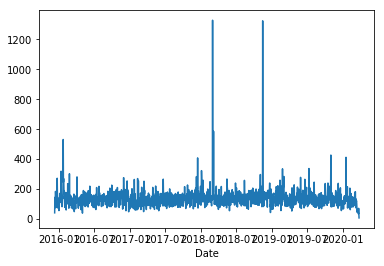

In [57]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()

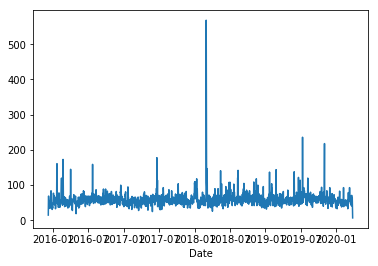

In [58]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()

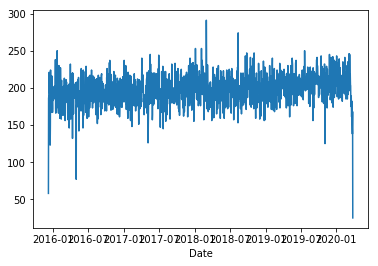

In [64]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [67]:
dayhour = df.groupby(by=['Day', 'Hour']).count()['twp'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,1842,1506,1353,1227,1223,1534,2523,3955,4782,4977,...,6009,6611,6665,6740,5329,4748,4081,3630,3205,2669
Mon,1764,1451,1270,1181,1247,1724,2550,4240,5265,5418,...,5305,5811,5980,6069,5124,4211,3538,3035,2476,1930
Sat,2280,1937,1785,1491,1357,1470,1763,2376,3271,4072,...,5098,4863,4879,4898,4701,4469,3887,3651,3020,2784
Sun,2284,2012,1819,1513,1383,1375,1635,2250,2835,3513,...,4417,4195,4244,4241,4119,3909,3494,2935,2440,2170
Thu,1604,1299,1314,1152,1181,1663,2667,4257,5075,5089,...,5651,6082,5972,6569,5199,4395,3826,3277,2657,2203
Tue,1601,1356,1243,1140,1163,1644,2649,4212,5371,5273,...,5554,5910,6141,6549,5324,4310,3607,3200,2525,1975
Wed,1558,1380,1186,1181,1039,1503,2532,4456,5216,5133,...,5590,6097,6355,6638,5318,4400,3839,3286,2615,2059


** Agora crie um mapa de calor usando este DataFrame **

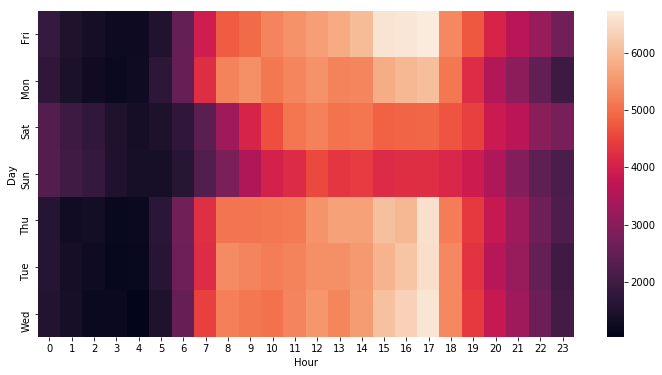

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour)

** Agora crie um clustermap usando este DataFrame. **

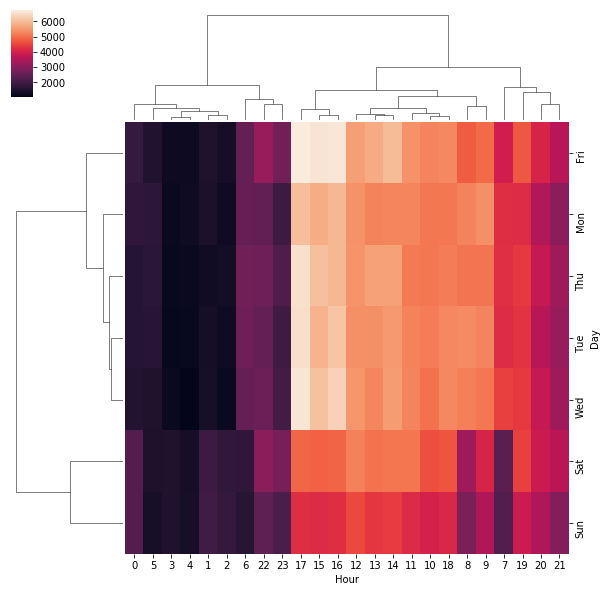

In [71]:
sns.clustermap(dayhour)

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [73]:
daymonth = df.groupby(by=['Day', 'Month']).count()['twp'].unstack()
daymonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day,,,,,,,,,,,,
Fri,9305,8251,10672,6921,7211,7642,7101,7332,7689,6931,8379,9303
Mon,8894,8743,7801,7167,6743,6739,7927,6853,6598,8068,6716,8489
Sat,8467,7589,7859,6527,5795,6836,6393,6108,6563,6607,6767,8588
Sun,7476,6450,6560,5909,5404,5668,6564,5272,5955,6315,5194,7162
Thu,9053,7995,8594,6146,7522,7848,6963,7502,6952,7482,8353,8147
Tue,9711,8083,8127,6487,7830,6681,7629,7289,6597,7946,7341,8301
Wed,9406,8294,8804,6257,7938,7052,6973,7979,6842,7871,7407,7677


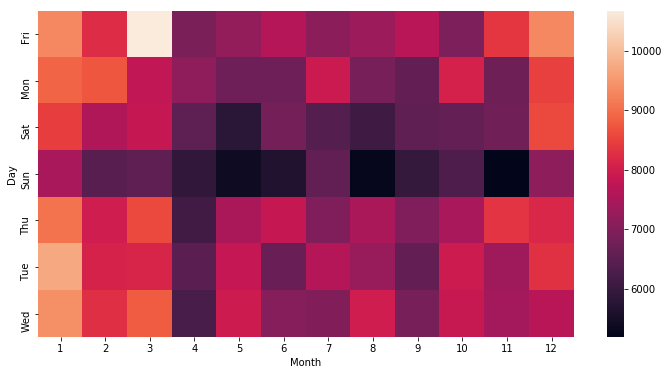

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth)

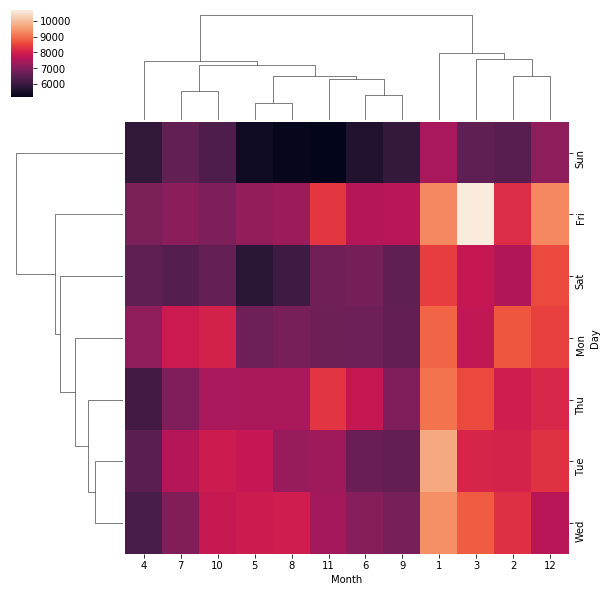

In [75]:
sns.clustermap(daymonth)